# Initialization. Load previous state. Load modules

In [1]:
import dill
# Restore the entire session
dill.load_session('Multiple_random_finetune_ptr.db')

In [2]:
#check last result on disk
#dir()

In [3]:
from tqdm import tqdm
import os
import random
import time

In [4]:
import json

import pandas as pd
import numpy as np
import numpy as cp
#import cupy as cp

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from finetuning_scripts.finetune_tabpfn_main import fine_tune_tabpfn
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [5]:
def finetunemymodel(X, y, param_grid , verbose):

    save_path_to_fine_tuned_model = param_grid.get("model_path")
    path_to_base_model = "auto"  # Valor por defecto

    # Verifica si el archivo existe
    if os.path.exists(save_path_to_fine_tuned_model):
        path_to_base_model = save_path_to_fine_tuned_model
        print(f"Cargando modelo base desde: {path_to_base_model}")
    else:
        print("No se encontró el modelo pre-entrenado. Usando 'auto' para el modelo base.")
    
    fine_tune_tabpfn(
        path_to_base_model=path_to_base_model,
        save_path_to_fine_tuned_model=save_path_to_fine_tuned_model,
        # Finetuning HPs
        time_limit=60,
        finetuning_config={"learning_rate": 0.0000002, "batch_size": 5},
        validation_metric="log_loss",
        X_train=pd.DataFrame(X),
        y_train=pd.Series(y),
        categorical_features_index=None,
        device=param_grid.get('device'), 
        task_type="multiclass",
        # Optional
        show_training_curve=True,  # Shows a final report after finetuning.
        logger_level=0,  # Shows all logs, higher values shows less
        use_wandb=False,  # Init wandb yourself, and set to True
    )


# Load datasets froms json file

In [6]:
# Load data from JSON
with open('data_classif.json', 'r') as json_file:
    loaded_datasets = json.load(json_file)


In [6]:
# Load data from JSON
with open('data_gc_classif.json', 'r') as json_file:
    loaded_datasets = json.load(json_file)


In [6]:
# Load data from JSON
with open('data_classif_breath.json', 'r') as json_file:
    breath_datasets = json.load(json_file)
    
loaded_datasets.update(breath_datasets)


# Train methods

## All datasets

Outer Loop (Excluyendo de a un dataset):   0%|                                         | 0/12 [00:00<?, ?it/s]


--- Excluyendo dataset: Etnia ---

--- Entrenamiento aleatorio (1/30) con dataset: Cafe ---
No se encontró el modelo pre-entrenado. Usando 'auto' para el modelo base.



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:51<10:08:48,  3.66s/it, Best Val. Loss=0.459, Best Val. Score=-0.459, 
Fine-tuning Steps:   0%| | 15/10000 [00:51<10:08:10,  3.65s/it, Best Val. Loss=0.459, Best Val. Score=-0.459, /home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 15/10000 [00:55<10:58:31,  3.96s/it, Best Val. Loss=0.459, Best Val. Score=-0.459, 
/home/granitto/.local/lib/python3.10/site-packages/matplotli

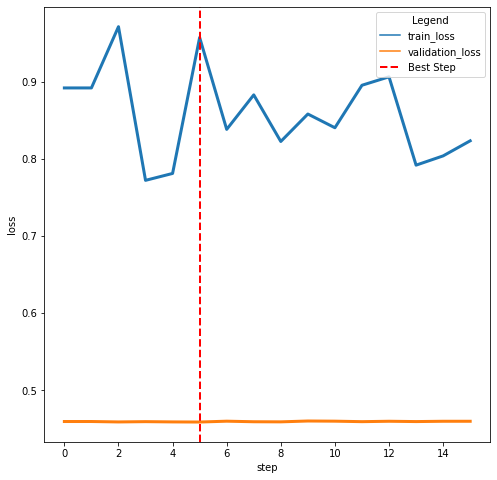


--- Entrenamiento aleatorio (2/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.598, Best Val. Score=-0.598, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<9:17:00,  3.34s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<9:17:00,  3.34s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:17:59,  2.99s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:17:59,  2.99s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:43:35,  3.14s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:43:35,  3.14s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<8:56:03,  3.22s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr


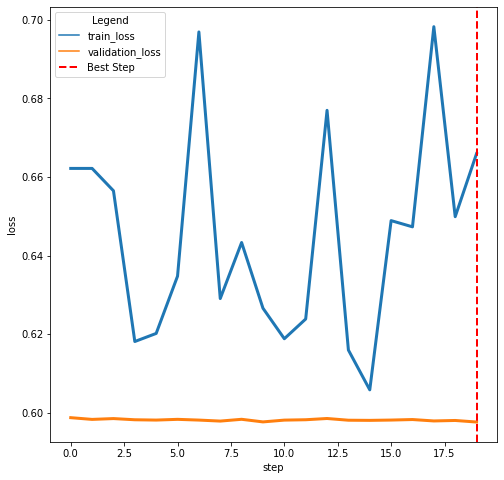


--- Entrenamiento aleatorio (3/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.598, Best Val. Score=-0.598, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:39:52,  2.76s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:39:52,  2.76s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:38:15,  2.75s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:08<7:38:15,  2.75s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<8:27:23,  3.05s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:11<8:27:23,  3.05s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:11<8:08:02,  2.93s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr


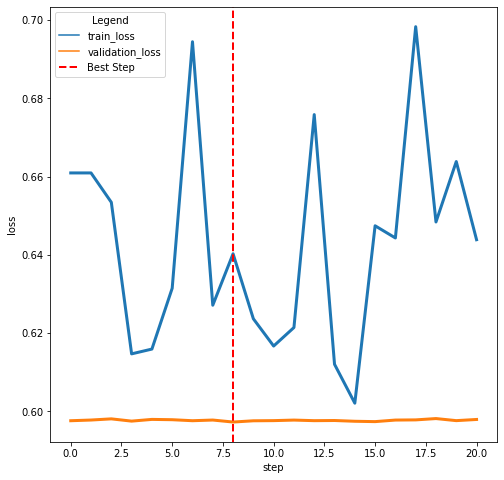


--- Entrenamiento aleatorio (4/30) con dataset: Mentine ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.866, Best Val. Score=-0.866, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:11:04,  4.03s/it, Best Val. Loss=0.866, Best Val. Score=-0.866, T
Fine-tuning Steps:   0%| | 2/10000 [00:08<11:11:04,  4.03s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:08<12:33:54,  4.52s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:33:54,  4.52s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<13:01:32,  4.69s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 4/10000 [00:18<13:01:32,  4.69s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 5/10000 [00:18<13:12:38,  4.76s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T


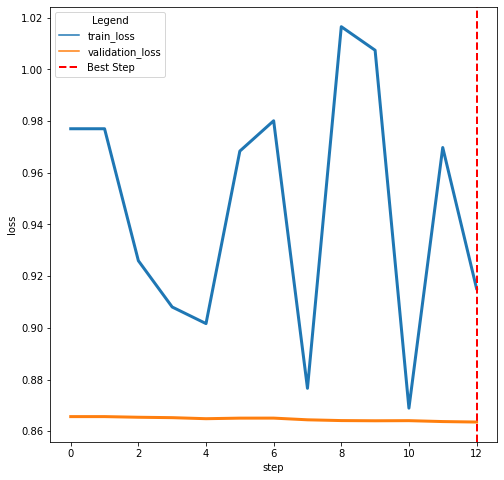


--- Entrenamiento aleatorio (5/30) con dataset: Mentine ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.864, Best Val. Score=-0.864, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:18:34,  4.07s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 2/10000 [00:09<11:18:34,  4.07s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:43:58,  4.59s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:43:58,  4.59s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:25:08,  4.47s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:18<12:25:08,  4.47s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 5/10000 [00:18<12:55:30,  4.66s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T


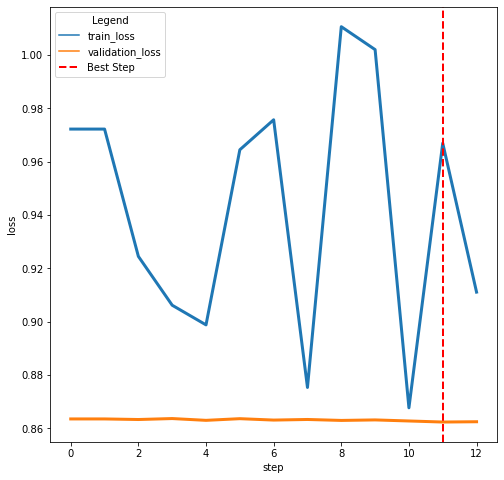


--- Entrenamiento aleatorio (6/30) con dataset: Cafe ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:55<11:45:03,  4.24s/it, Best Val. Loss=0.123, Best Val. Score=-0.123, 


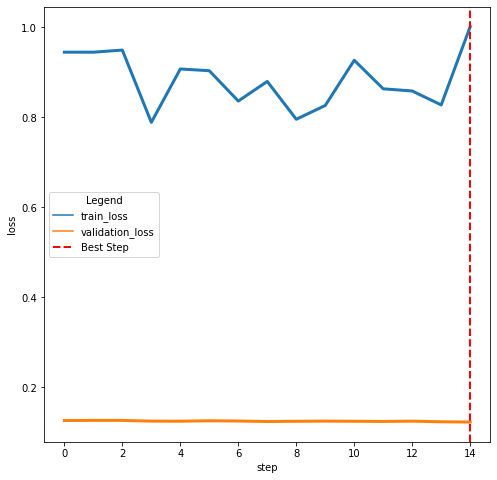


--- Entrenamiento aleatorio (7/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


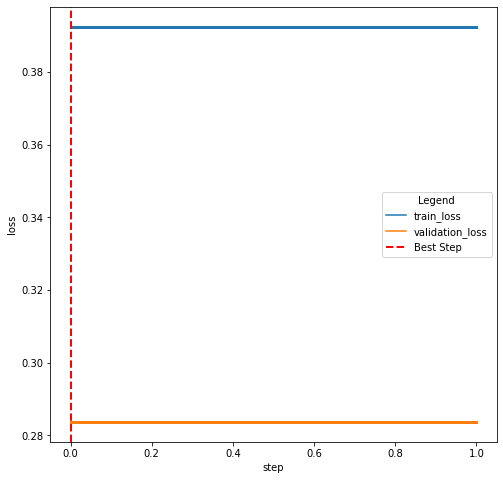


--- Entrenamiento aleatorio (8/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


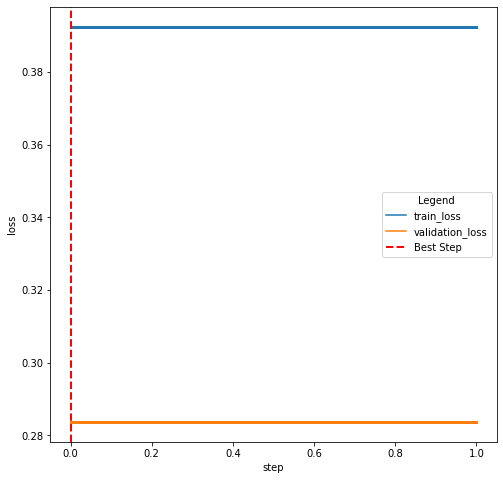


--- Entrenamiento aleatorio (9/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.598, Best Val. Score=-0.598, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:46:43,  2.80s/it, Best Val. Loss=0.598, Best Val. Score=-0.598, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<7:46:43,  2.80s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:45:05,  3.15s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:08<8:45:05,  3.15s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<8:17:20,  2.99s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:11<8:17:20,  2.99s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:11<8:03:25,  2.90s/it, Best Val. Loss=0.597, Best Val. Score=-0.597, Tr


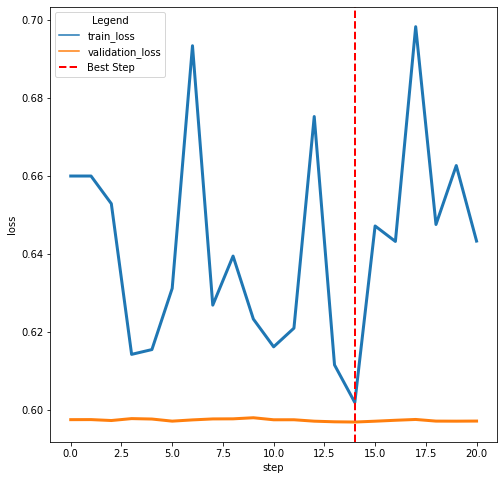


--- Entrenamiento aleatorio (10/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.363, Best Val. Score=-0.363, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:39:34,  2.76s/it, Best Val. Loss=0.363, Best Val. Score=-0.363, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:39:34,  2.76s/it, Best Val. Loss=0.363, Best Val. Score=-0.363, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:37:57,  2.75s/it, Best Val. Loss=0.363, Best Val. Score=-0.363, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<7:37:57,  2.75s/it, Best Val. Loss=0.363, Best Val. Score=-0.363, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:53:07,  2.48s/it, Best Val. Loss=0.363, Best Val. Score=-0.363, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<6:53:07,  2.48s/it, Best Val. Loss=0.361, Best Val. Score=-0.361, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:10<7:11:19,  2.59s/it, Best Val. Loss=0.361, Best Val. Score=-0.361, Tr


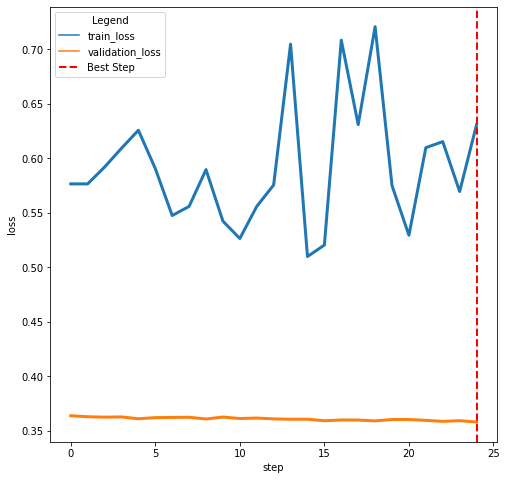


--- Entrenamiento aleatorio (11/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.000709, Best Val. Score=-0.000709, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:13:52,  5.12s/it, Best Val. Loss=0.000709, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:09<14:13:52,  5.12s/it, Best Val. Loss=0.000709, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:15:09,  4.77s/it, Best Val. Loss=0.000709, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:15:09,  4.77s/it, Best Val. Loss=0.000703, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:40:20,  4.92s/it, Best Val. Loss=0.000703, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:19<13:40:20,  4.92s/it, Best Val. Loss=0.000703, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 5/10000 [00:19<12:55:47,  4.66s/it, Best Val. Loss=0.000703, Best Val. Score=-0.000


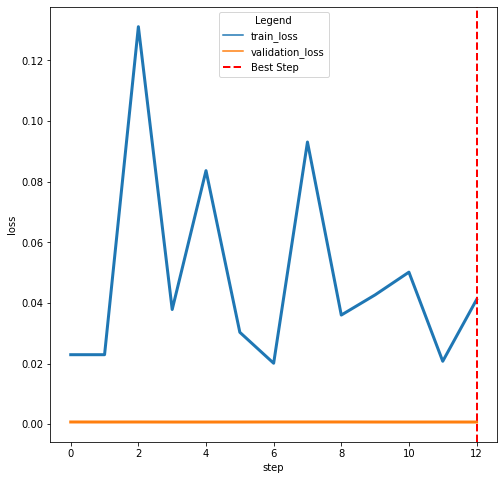


--- Entrenamiento aleatorio (12/30) con dataset: Ham ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.544, Best Val. Score=-0.544, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:30,  3.08s/it, Best Val. Loss=0.544, Best Val. Score=-0.544, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:30,  3.08s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<9:50:34,  3.54s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<9:50:34,  3.54s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<10:15:40,  3.70s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, T
Fine-tuning Steps:   0%| | 4/10000 [00:14<10:15:40,  3.70s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, T
Fine-tuning Steps:   0%| | 5/10000 [00:14<9:48:45,  3.53s/it, Best Val. Loss=0.543, Best Val. Score=-0.543, Tr


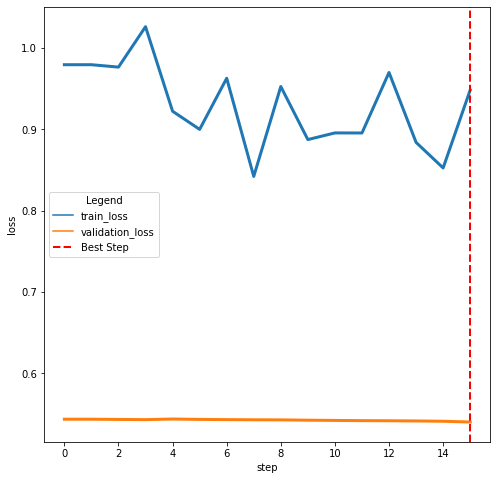


--- Entrenamiento aleatorio (13/30) con dataset: Mentine ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.865, Best Val. Score=-0.865, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:18:53,  4.07s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 2/10000 [00:08<11:18:53,  4.07s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:08<11:44:40,  4.23s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<11:44:40,  4.23s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:37:44,  4.55s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 4/10000 [00:17<12:37:44,  4.55s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 5/10000 [00:17<12:23:26,  4.46s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T


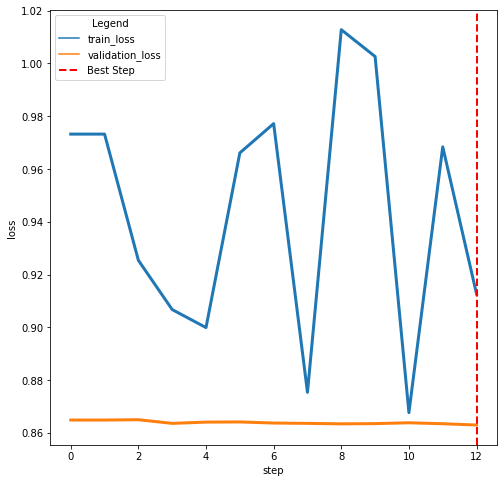


--- Entrenamiento aleatorio (14/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


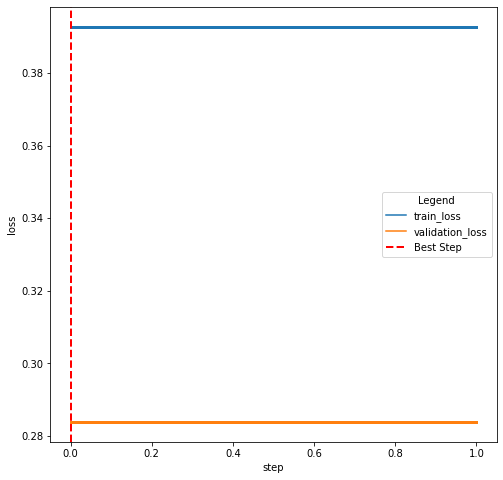


--- Entrenamiento aleatorio (15/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.000708, Best Val. Score=-0.000708, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:13:59,  5.12s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:09<14:13:59,  5.12s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:15:13,  4.77s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:15:13,  4.77s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:14<12:56:21,  4.66s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:18<12:56:21,  4.66s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 5/10000 [00:18<12:28:56,  4.50s/it, Best Val. Loss=0.000708, Best Val. Score=-0.000


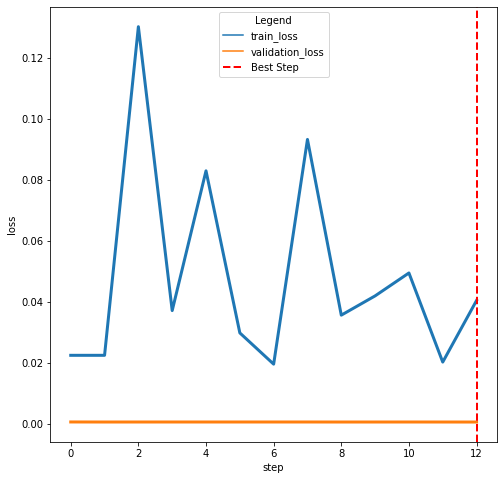


--- Entrenamiento aleatorio (16/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.358, Best Val. Score=-0.358, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:49:27,  2.82s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:04<7:49:27,  2.82s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:04<6:45:15,  2.43s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<6:45:15,  2.43s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:24:44,  2.31s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:24:44,  2.31s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:14:58,  2.25s/it, Best Val. Loss=0.358, Best Val. Score=-0.358, Tr


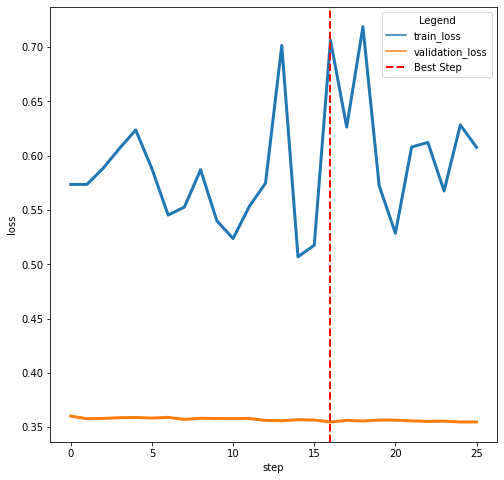


--- Entrenamiento aleatorio (17/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


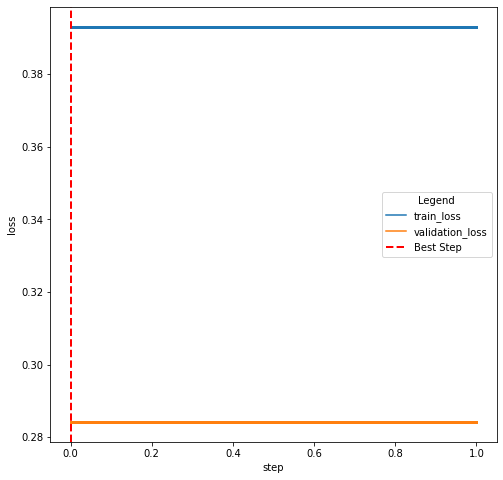


--- Entrenamiento aleatorio (18/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.596, Best Val. Score=-0.596, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<9:23:52,  3.38s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<9:23:52,  3.38s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:23:52,  3.02s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:08<8:23:52,  3.02s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<8:04:48,  2.91s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:11<8:04:48,  2.91s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:11<7:55:39,  2.86s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr


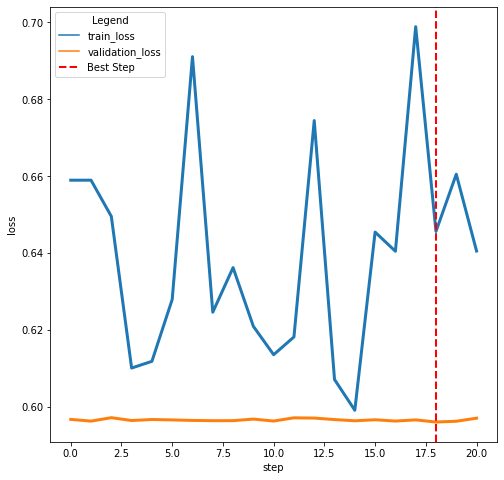


--- Entrenamiento aleatorio (19/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.596, Best Val. Score=-0.596, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:45:52,  2.80s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:45:52,  2.80s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:43:23,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:08<7:43:23,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<7:42:49,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:11<7:42:49,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:11<7:42:28,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr


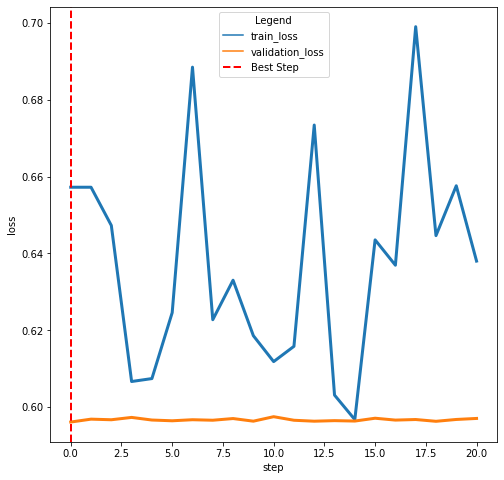


--- Entrenamiento aleatorio (20/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.596, Best Val. Score=-0.596, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:46:28,  2.80s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:46:28,  2.80s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:43:54,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:08<7:43:54,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<7:43:06,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:11<7:43:06,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:11<7:42:31,  2.78s/it, Best Val. Loss=0.596, Best Val. Score=-0.596, Tr


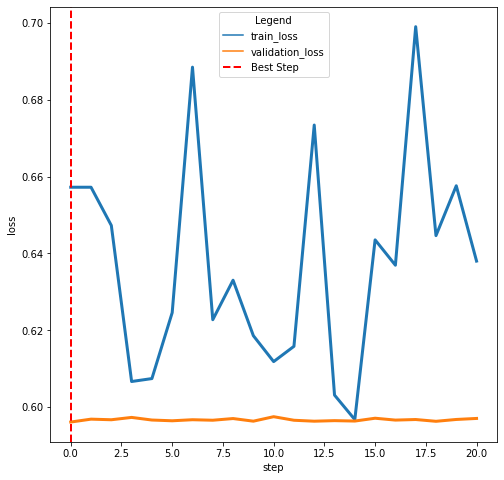


--- Entrenamiento aleatorio (21/30) con dataset: Tea ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:08<?, ?it/s, Best Val. Loss=0.228, Best Val. Score=-0.228, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:08<24:09:01,  8.70s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 2/10000 [00:17<24:09:01,  8.70s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 3/10000 [00:17<25:06:54,  9.04s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 3/10000 [00:26<25:06:54,  9.04s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 4/10000 [00:26<24:38:01,  8.87s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 4/10000 [00:36<24:38:01,  8.87s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T
Fine-tuning Steps:   0%| | 5/10000 [00:36<25:42:00,  9.26s/it, Best Val. Loss=0.228, Best Val. Score=-0.228, T


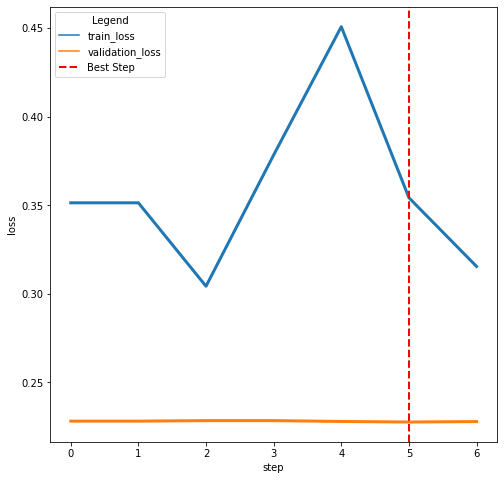


--- Entrenamiento aleatorio (22/30) con dataset: Forest ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.136, Best Val. Score=-0.136, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:11:44,  2.59s/it, Best Val. Loss=0.136, Best Val. Score=-0.136, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:11:44,  2.59s/it, Best Val. Loss=0.136, Best Val. Score=-0.136, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<8:23:40,  3.02s/it, Best Val. Loss=0.136, Best Val. Score=-0.136, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:23:40,  3.02s/it, Best Val. Loss=0.136, Best Val. Score=-0.136, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:47:53,  3.17s/it, Best Val. Loss=0.136, Best Val. Score=-0.136, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:47:53,  3.17s/it, Best Val. Loss=0.135, Best Val. Score=-0.135, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<8:58:42,  3.23s/it, Best Val. Loss=0.135, Best Val. Score=-0.135, Tr


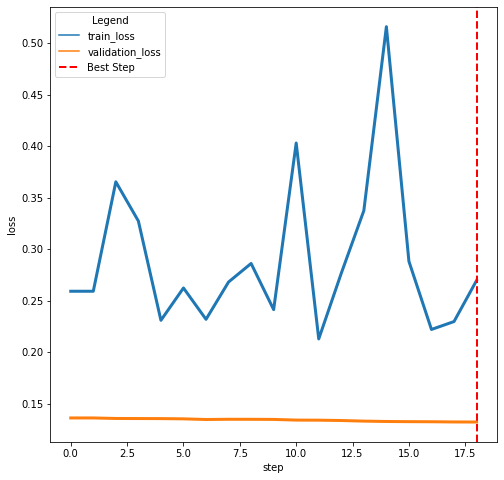


--- Entrenamiento aleatorio (23/30) con dataset: Mentine ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.865, Best Val. Score=-0.865, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:18:54,  4.07s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 2/10000 [00:08<11:18:54,  4.07s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:08<12:42:12,  4.57s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:42:12,  4.57s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:23:44,  4.46s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 4/10000 [00:17<12:23:44,  4.46s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T
Fine-tuning Steps:   0%| | 5/10000 [00:17<12:15:01,  4.41s/it, Best Val. Loss=0.865, Best Val. Score=-0.865, T


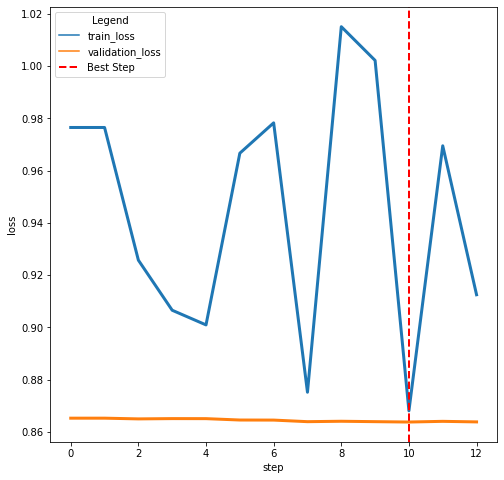


--- Entrenamiento aleatorio (24/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.35, Best Val. Score=-0.35, Training Loss=
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:49:15,  2.82s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 2/10000 [00:04<7:49:15,  2.82s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:04<6:44:50,  2.43s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:07<6:44:50,  2.43s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:24:20,  2.31s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:24:20,  2.31s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:52:37,  2.48s/it, Best Val. Loss=0.35, Best Val. Score=-0.35, Trai


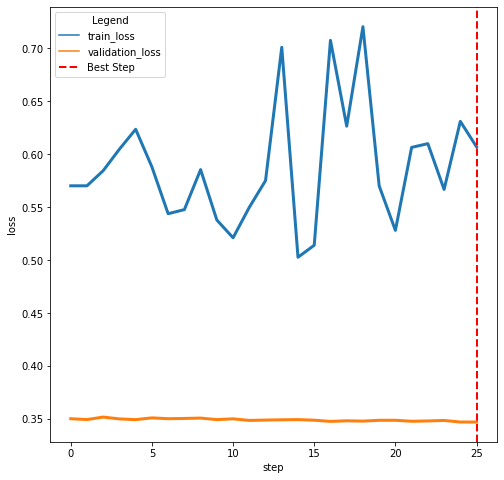


--- Entrenamiento aleatorio (25/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.347, Best Val. Score=-0.347, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:39:23,  2.76s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:39:23,  2.76s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:40:18,  2.76s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<7:40:18,  2.76s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:54:59,  2.49s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:54:59,  2.49s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:33:20,  2.36s/it, Best Val. Loss=0.346, Best Val. Score=-0.346, Tr


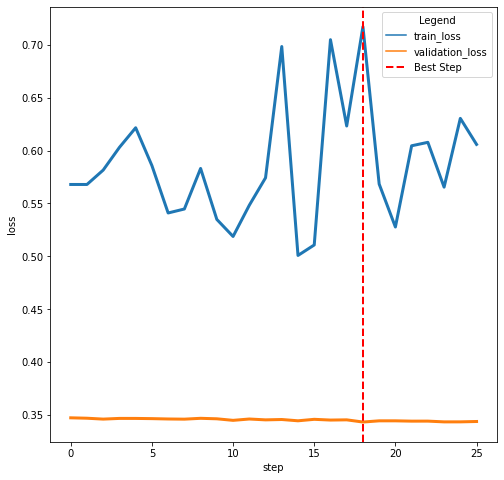


--- Entrenamiento aleatorio (26/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.000683, Best Val. Score=-0.000683, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:15:21,  5.13s/it, Best Val. Loss=0.000683, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:10<14:15:21,  5.13s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 3/10000 [00:10<14:11:19,  5.11s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 3/10000 [00:14<14:11:19,  5.11s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:27:01,  4.84s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 4/10000 [00:19<13:27:01,  4.84s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 5/10000 [00:19<12:47:42,  4.61s/it, Best Val. Loss=0.00068, Best Val. Score=-0.0006


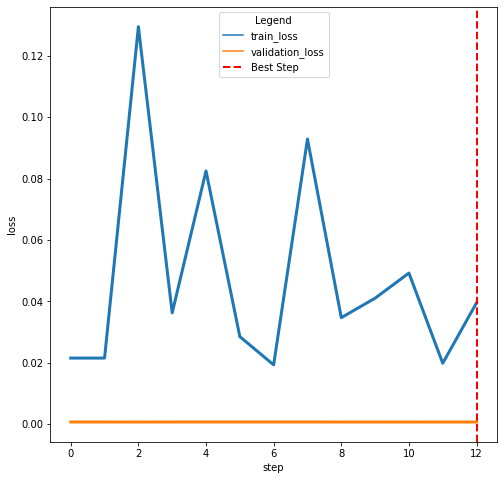


--- Entrenamiento aleatorio (27/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.343, Best Val. Score=-0.343, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<6:03:51,  2.18s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:04<6:03:51,  2.18s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:04<6:01:59,  2.17s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<6:01:59,  2.17s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:06<6:01:10,  2.17s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:08<6:01:10,  2.17s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:08<6:00:50,  2.17s/it, Best Val. Loss=0.343, Best Val. Score=-0.343, Tr


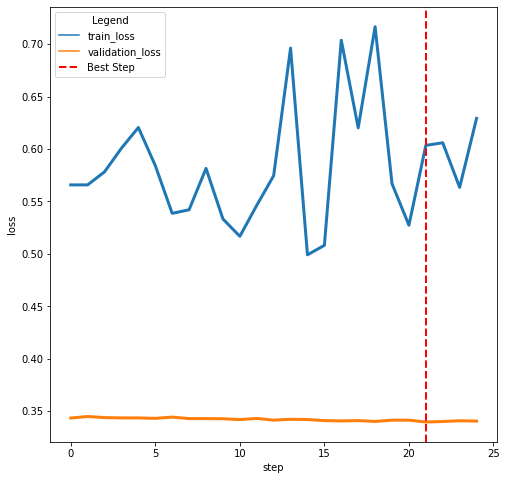


--- Entrenamiento aleatorio (28/30) con dataset: Cafe ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:56<12:05:26,  4.36s/it, Best Val. Loss=0.115, Best Val. Score=-0.115, 


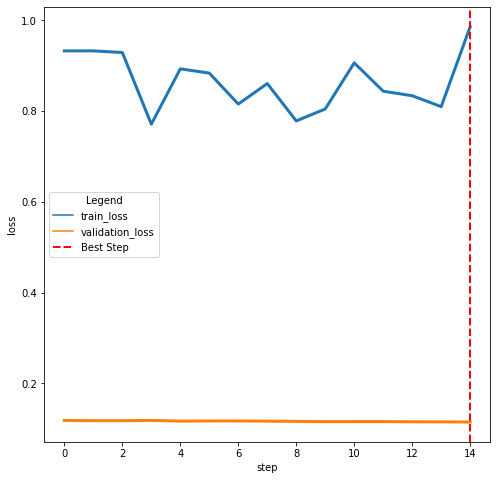


--- Entrenamiento aleatorio (29/30) con dataset: Forest ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.133, Best Val. Score=-0.133, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:11:53,  2.59s/it, Best Val. Loss=0.133, Best Val. Score=-0.133, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:11:53,  2.59s/it, Best Val. Loss=0.133, Best Val. Score=-0.133, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<8:25:23,  3.03s/it, Best Val. Loss=0.133, Best Val. Score=-0.133, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:25:23,  3.03s/it, Best Val. Loss=0.132, Best Val. Score=-0.132, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:47:32,  3.17s/it, Best Val. Loss=0.132, Best Val. Score=-0.132, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:47:32,  3.17s/it, Best Val. Loss=0.132, Best Val. Score=-0.132, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<8:20:29,  3.00s/it, Best Val. Loss=0.132, Best Val. Score=-0.132, Tr


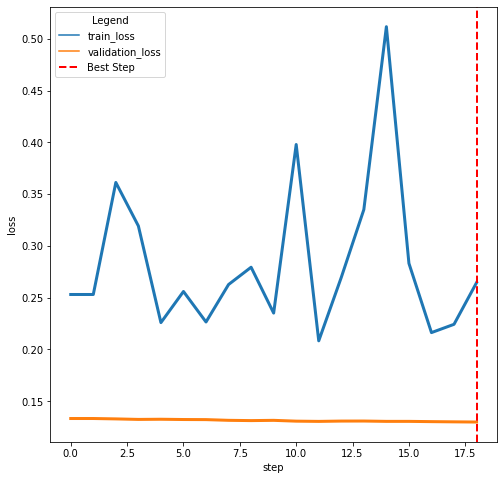


--- Entrenamiento aleatorio (30/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Etnia.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.336, Best Val. Score=-0.336, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:40:44,  2.77s/it, Best Val. Loss=0.336, Best Val. Score=-0.336, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:04<7:40:44,  2.77s/it, Best Val. Loss=0.336, Best Val. Score=-0.336, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:04<6:42:36,  2.42s/it, Best Val. Loss=0.336, Best Val. Score=-0.336, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<6:42:36,  2.42s/it, Best Val. Loss=0.336, Best Val. Score=-0.336, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:23:22,  2.30s/it, Best Val. Loss=0.336, Best Val. Score=-0.336, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:23:22,  2.30s/it, Best Val. Loss=0.334, Best Val. Score=-0.334, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:52:06,  2.47s/it, Best Val. Loss=0.334, Best Val. Score=-0.334, Tr


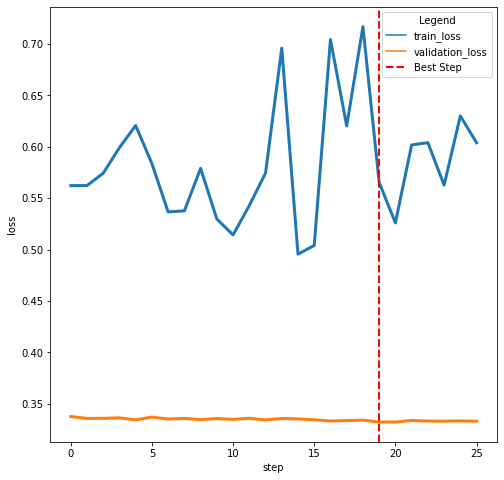

Outer Loop (Excluyendo de a un dataset):   8%|██▍                          | 1/12 [27:21<5:00:59, 1641.77s/it]


--- Excluyendo dataset: Mentine ---

--- Entrenamiento aleatorio (1/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.496, Best Val. Score=-0.496, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:31:29,  3.07s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:31:29,  3.07s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:51:48,  3.19s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:51:48,  3.19s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:57:59,  3.23s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:57:59,  3.23s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<9:00:50,  3.25s/it, Best Val. Loss=0.496, Best Val. Score=-0.496, Tr


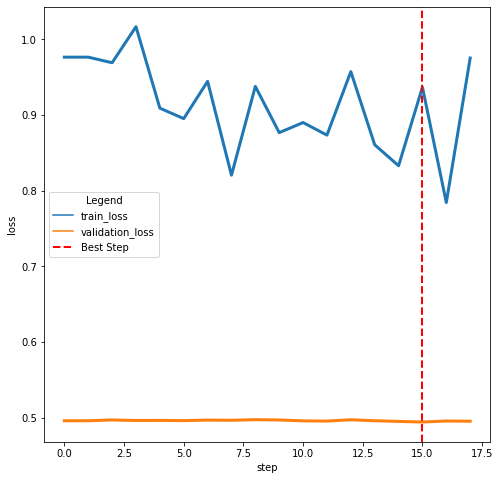


--- Entrenamiento aleatorio (2/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.000543, Best Val. Score=-0.000543, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:38:15,  4.55s/it, Best Val. Loss=0.000543, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:38:15,  4.55s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:31:51,  4.87s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:31:51,  4.87s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:05:28,  4.71s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:18<13:05:28,  4.71s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 5/10000 [00:18<12:34:26,  4.53s/it, Best Val. Loss=0.000538, Best Val. Score=-0.000


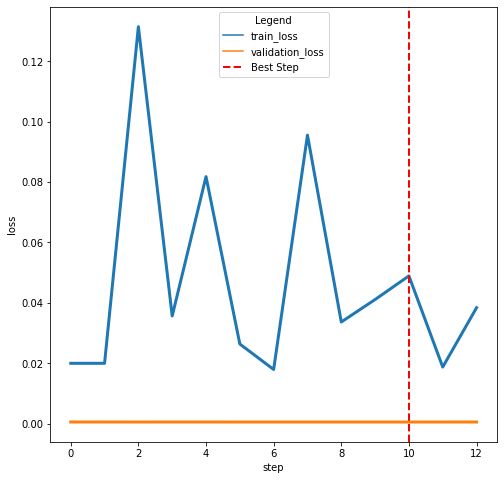


--- Entrenamiento aleatorio (3/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.591, Best Val. Score=-0.591, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<9:26:42,  3.40s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<9:26:42,  3.40s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<9:24:17,  3.39s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<9:24:17,  3.39s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:38:24,  3.11s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:38:24,  3.11s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<8:16:22,  2.98s/it, Best Val. Loss=0.591, Best Val. Score=-0.591, Tr


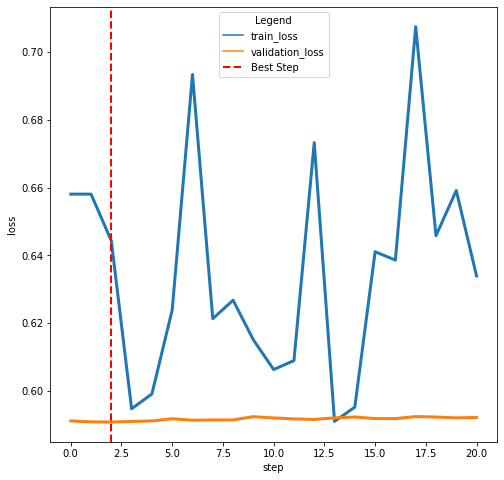


--- Entrenamiento aleatorio (4/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.000536, Best Val. Score=-0.000536, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:37:44,  4.55s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:37:44,  4.55s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:35:27,  4.53s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:35:27,  4.53s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:34:45,  4.53s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:17<12:34:45,  4.53s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 5/10000 [00:17<12:15:56,  4.42s/it, Best Val. Loss=0.000536, Best Val. Score=-0.000


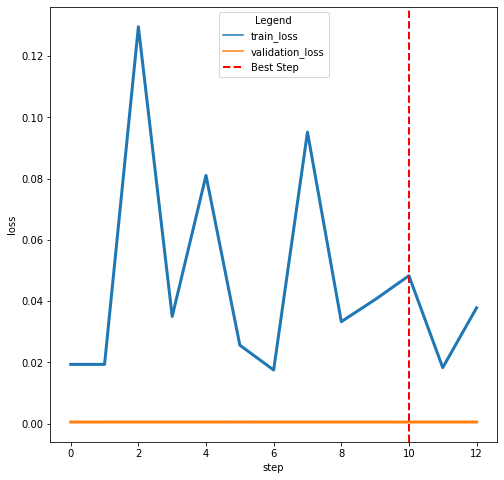


--- Entrenamiento aleatorio (5/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.495, Best Val. Score=-0.495, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:41,  3.08s/it, Best Val. Loss=0.495, Best Val. Score=-0.495, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:41,  3.08s/it, Best Val. Loss=0.494, Best Val. Score=-0.494, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<9:53:03,  3.56s/it, Best Val. Loss=0.494, Best Val. Score=-0.494, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<9:53:03,  3.56s/it, Best Val. Loss=0.494, Best Val. Score=-0.494, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<9:31:29,  3.43s/it, Best Val. Loss=0.494, Best Val. Score=-0.494, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:14<9:31:29,  3.43s/it, Best Val. Loss=0.493, Best Val. Score=-0.493, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:14<10:00:02,  3.60s/it, Best Val. Loss=0.493, Best Val. Score=-0.493, T


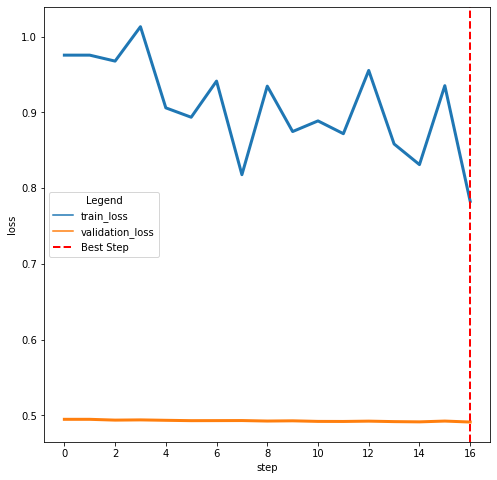


--- Entrenamiento aleatorio (6/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.323, Best Val. Score=-0.323, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:39:20,  2.76s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:39:20,  2.76s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:38:40,  2.75s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<7:38:40,  2.75s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:53:53,  2.48s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:53:53,  2.48s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:32:42,  2.36s/it, Best Val. Loss=0.323, Best Val. Score=-0.323, Tr


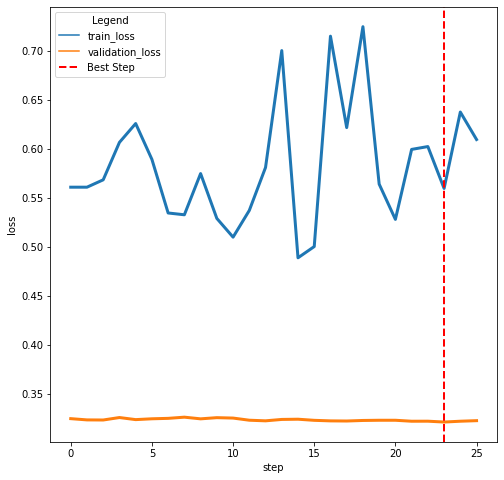


--- Entrenamiento aleatorio (7/30) con dataset: Forest ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.121, Best Val. Score=-0.121, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:12:21,  2.59s/it, Best Val. Loss=0.121, Best Val. Score=-0.121, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:12:21,  2.59s/it, Best Val. Loss=0.121, Best Val. Score=-0.121, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<8:25:59,  3.04s/it, Best Val. Loss=0.121, Best Val. Score=-0.121, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:25:59,  3.04s/it, Best Val. Loss=0.121, Best Val. Score=-0.121, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:48:31,  3.17s/it, Best Val. Loss=0.121, Best Val. Score=-0.121, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:48:31,  3.17s/it, Best Val. Loss=0.12, Best Val. Score=-0.12, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:12<8:57:59,  3.23s/it, Best Val. Loss=0.12, Best Val. Score=-0.12, Trai


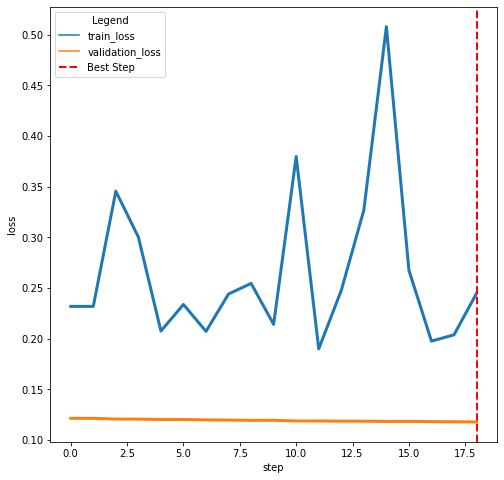


--- Entrenamiento aleatorio (8/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.0212, Best Val. Score=-0.0212, Training L
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:15:18,  5.13s/it, Best Val. Loss=0.0212, Best Val. Score=-0.0212,
Fine-tuning Steps:   0%| | 2/10000 [00:09<14:15:18,  5.13s/it, Best Val. Loss=0.0212, Best Val. Score=-0.0212,
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:15:57,  4.78s/it, Best Val. Loss=0.0212, Best Val. Score=-0.0212,
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:15:57,  4.78s/it, Best Val. Loss=0.0212, Best Val. Score=-0.0212,
Fine-tuning Steps:   0%| | 4/10000 [00:14<12:56:54,  4.66s/it, Best Val. Loss=0.0212, Best Val. Score=-0.0212,
Fine-tuning Steps:   0%| | 4/10000 [00:19<12:56:54,  4.66s/it, Best Val. Loss=0.0211, Best Val. Score=-0.0211,
Fine-tuning Steps:   0%| | 5/10000 [00:19<13:26:12,  4.84s/it, Best Val. Loss=0.0211, Best Val. Score=-0.0211,


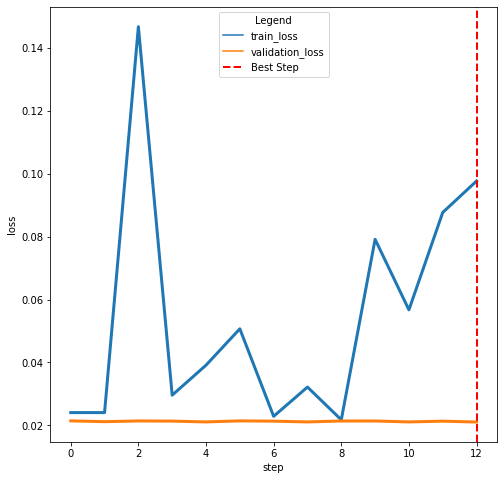


--- Entrenamiento aleatorio (9/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.59, Best Val. Score=-0.59, Training Loss=
Fine-tuning Steps:   0%| | 2/10000 [00:03<9:22:22,  3.37s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 2/10000 [00:06<9:22:22,  3.37s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:23:43,  3.02s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:08<8:23:43,  3.02s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:08<8:04:41,  2.91s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:11<8:04:41,  2.91s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:11<7:55:35,  2.86s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai


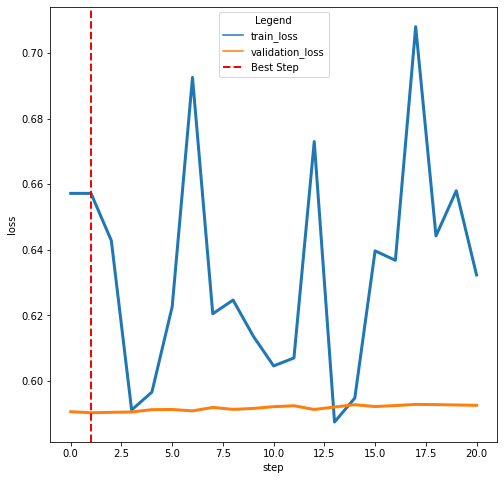


--- Entrenamiento aleatorio (10/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.289, Best Val. Score=-0.289, Training Los


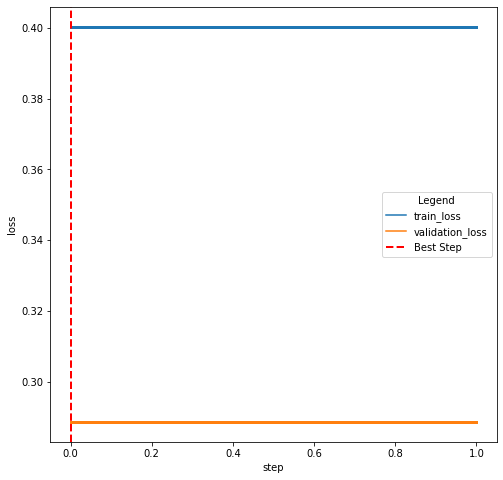


--- Entrenamiento aleatorio (11/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.486, Best Val. Score=-0.486, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:07,  3.07s/it, Best Val. Loss=0.486, Best Val. Score=-0.486, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:07,  3.07s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<9:48:21,  3.53s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<9:48:21,  3.53s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<9:28:49,  3.41s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:13<9:28:49,  3.41s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:13<9:19:27,  3.36s/it, Best Val. Loss=0.485, Best Val. Score=-0.485, Tr


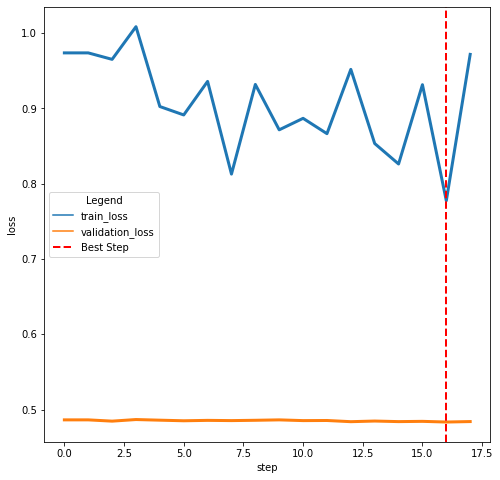


--- Entrenamiento aleatorio (12/30) con dataset: Spinaci ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.59, Best Val. Score=-0.59, Training Loss=
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:46:04,  2.80s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:46:04,  2.80s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:43:48,  2.78s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:08<7:43:48,  2.78s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:08<7:43:03,  2.78s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:11<7:43:03,  2.78s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:11<7:42:35,  2.78s/it, Best Val. Loss=0.59, Best Val. Score=-0.59, Trai


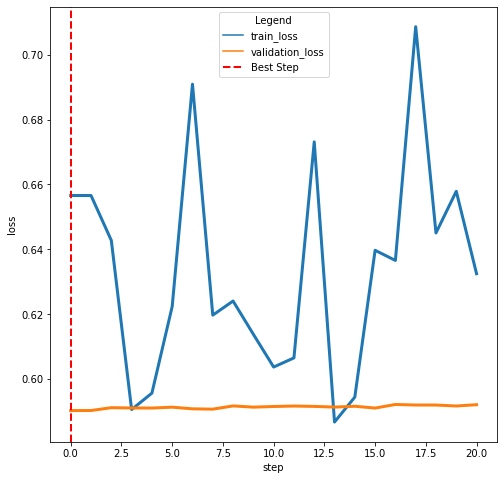


--- Entrenamiento aleatorio (13/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.483, Best Val. Score=-0.483, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:11,  3.07s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:11,  3.07s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:52:51,  3.20s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<8:52:51,  3.20s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<9:45:28,  3.51s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:13<9:45:28,  3.51s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:13<9:29:54,  3.42s/it, Best Val. Loss=0.483, Best Val. Score=-0.483, Tr


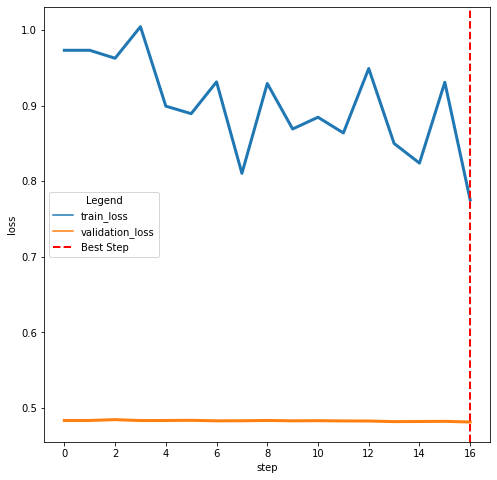


--- Entrenamiento aleatorio (14/30) con dataset: Cafe ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:55<11:44:15,  4.23s/it, Best Val. Loss=0.0931, Best Val. Score=-0.0931


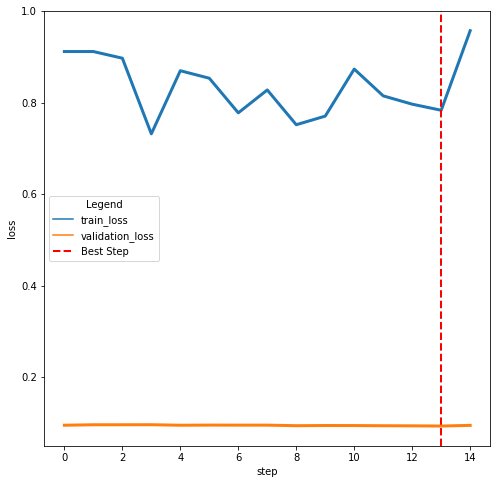


--- Entrenamiento aleatorio (15/30) con dataset: Funghi13 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:00<?, ?it/s, Best Val. Loss=0.771, Best Val. Score=-0.771, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:00<1:38:04,  1.70it/s, Best Val. Loss=0.771, Best Val. Score=-0.771, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:01<1:38:04,  1.70it/s, Best Val. Loss=0.771, Best Val. Score=-0.771, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:01<2:37:24,  1.06it/s, Best Val. Loss=0.771, Best Val. Score=-0.771, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:03<2:37:24,  1.06it/s, Best Val. Loss=0.77, Best Val. Score=-0.77, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:03<3:03:49,  1.10s/it, Best Val. Loss=0.77, Best Val. Score=-0.77, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:03<3:03:49,  1.10s/it, Best Val. Loss=0.77, Best Val. Score=-0.77, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:03<2:32:06,  1.10it/s, Best Val. Loss=0.77, Best Val. Score=-0.77, Trai


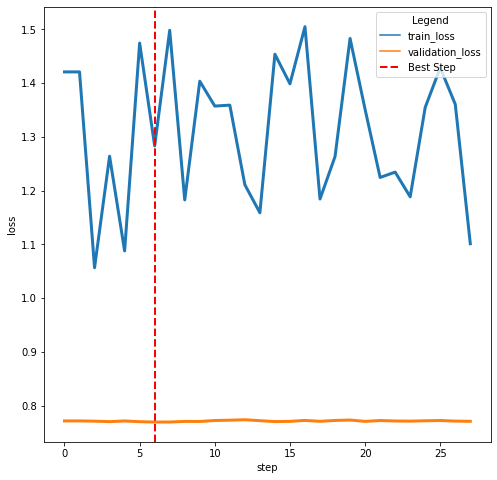


--- Entrenamiento aleatorio (16/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.021, Best Val. Score=-0.021, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:37:57,  4.55s/it, Best Val. Loss=0.021, Best Val. Score=-0.021, T
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:37:57,  4.55s/it, Best Val. Loss=0.0209, Best Val. Score=-0.0209,
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:33:36,  4.88s/it, Best Val. Loss=0.0209, Best Val. Score=-0.0209,
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:33:36,  4.88s/it, Best Val. Loss=0.0209, Best Val. Score=-0.0209,
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:06:29,  4.72s/it, Best Val. Loss=0.0209, Best Val. Score=-0.0209,
Fine-tuning Steps:   0%| | 4/10000 [00:19<13:06:29,  4.72s/it, Best Val. Loss=0.0207, Best Val. Score=-0.0207,
Fine-tuning Steps:   0%| | 5/10000 [00:19<13:31:41,  4.87s/it, Best Val. Loss=0.0207, Best Val. Score=-0.0207,


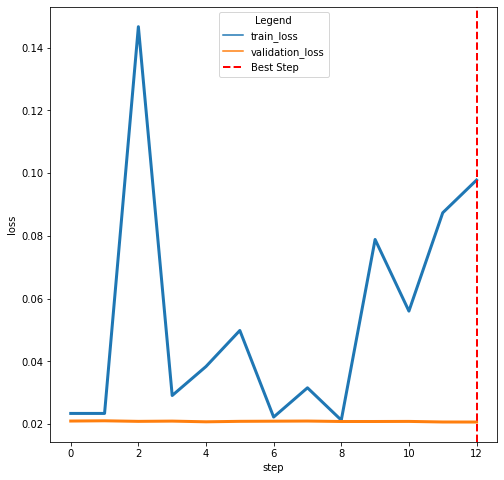


--- Entrenamiento aleatorio (17/30) con dataset: Forest ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.117, Best Val. Score=-0.117, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:12:25,  2.60s/it, Best Val. Loss=0.117, Best Val. Score=-0.117, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:12:25,  2.60s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<8:26:01,  3.04s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:26:01,  3.04s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:57:23,  3.23s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:57:23,  3.23s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<9:05:31,  3.27s/it, Best Val. Loss=0.116, Best Val. Score=-0.116, Tr


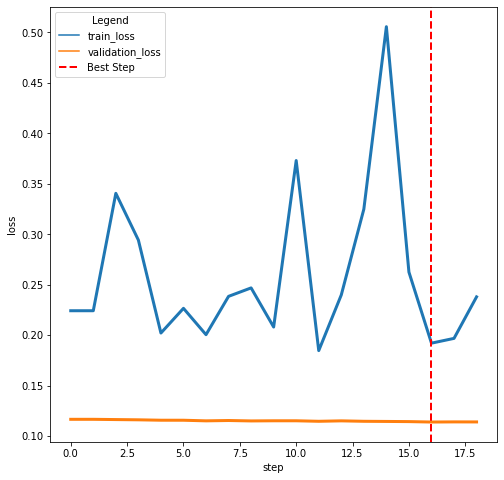


--- Entrenamiento aleatorio (18/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.315, Best Val. Score=-0.315, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:36:48,  2.74s/it, Best Val. Loss=0.315, Best Val. Score=-0.315, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:36:48,  2.74s/it, Best Val. Loss=0.315, Best Val. Score=-0.315, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:40:05,  2.76s/it, Best Val. Loss=0.315, Best Val. Score=-0.315, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<7:40:05,  2.76s/it, Best Val. Loss=0.315, Best Val. Score=-0.315, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:54:45,  2.49s/it, Best Val. Loss=0.315, Best Val. Score=-0.315, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<6:54:45,  2.49s/it, Best Val. Loss=0.314, Best Val. Score=-0.314, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:10<7:11:22,  2.59s/it, Best Val. Loss=0.314, Best Val. Score=-0.314, Tr


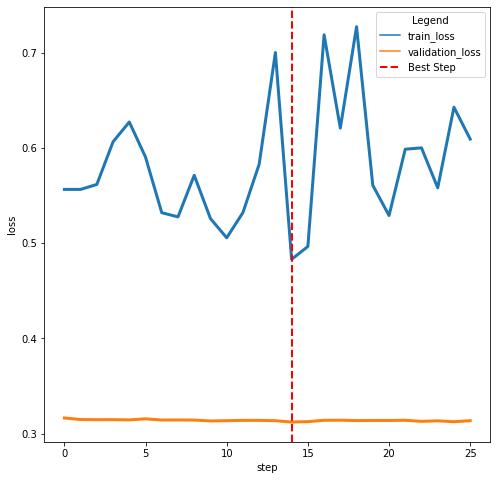


--- Entrenamiento aleatorio (19/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.312, Best Val. Score=-0.312, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:43:56,  2.78s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:04<7:43:56,  2.78s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:04<6:43:03,  2.42s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<6:43:03,  2.42s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:23:11,  2.30s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:23:11,  2.30s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:13:57,  2.24s/it, Best Val. Loss=0.312, Best Val. Score=-0.312, Tr


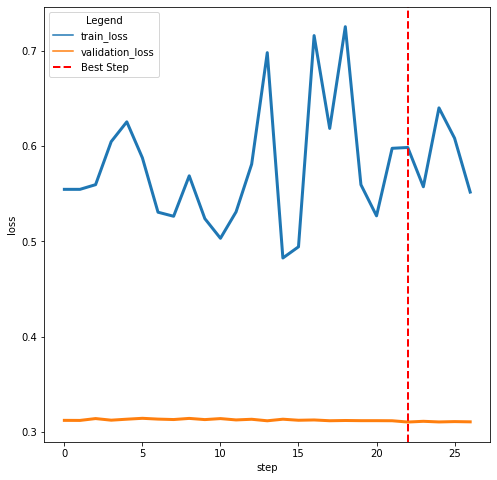


--- Entrenamiento aleatorio (20/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.0205, Best Val. Score=-0.0205, Training L
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:18:04,  5.15s/it, Best Val. Loss=0.0205, Best Val. Score=-0.0205,
Fine-tuning Steps:   0%| | 2/10000 [00:10<14:18:04,  5.15s/it, Best Val. Loss=0.0204, Best Val. Score=-0.0204,
Fine-tuning Steps:   0%| | 3/10000 [00:10<14:16:24,  5.14s/it, Best Val. Loss=0.0204, Best Val. Score=-0.0204,
Fine-tuning Steps:   0%| | 3/10000 [00:14<14:16:24,  5.14s/it, Best Val. Loss=0.0204, Best Val. Score=-0.0204,
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:30:18,  4.86s/it, Best Val. Loss=0.0204, Best Val. Score=-0.0204,
Fine-tuning Steps:   0%| | 4/10000 [00:19<13:30:18,  4.86s/it, Best Val. Loss=0.0203, Best Val. Score=-0.0203,
Fine-tuning Steps:   0%| | 5/10000 [00:19<13:47:46,  4.97s/it, Best Val. Loss=0.0203, Best Val. Score=-0.0203,


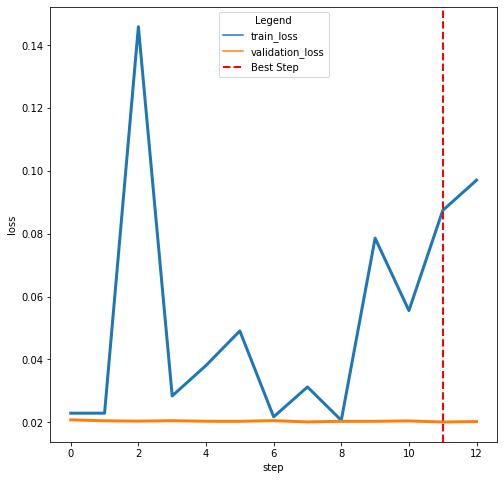


--- Entrenamiento aleatorio (21/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.289, Best Val. Score=-0.289, Training Los


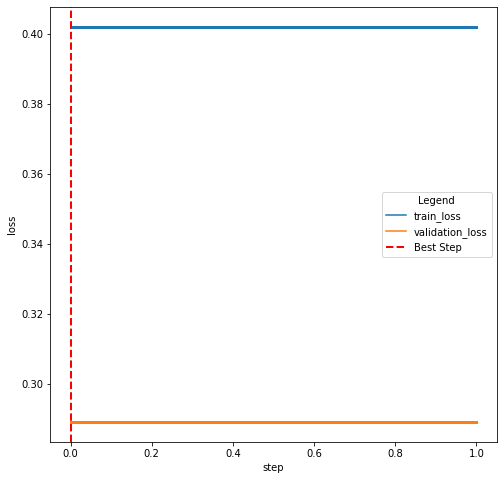


--- Entrenamiento aleatorio (22/30) con dataset: Etnia ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:00<?, ?it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:00<1:00:33,  2.75it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:00<1:00:33,  2.75it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:00<58:09,  2.86it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Trai
Fine-tuning Steps:   0%| | 3/10000 [00:01<58:09,  2.86it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:01<57:24,  2.90it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Trai
Fine-tuning Steps:   0%| | 4/10000 [00:01<57:24,  2.90it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Trai
Fine-tuning Steps:   0%| | 5/10000 [00:01<57:04,  2.92it/s, Best Val. Loss=0.583, Best Val. Score=-0.583, Trai


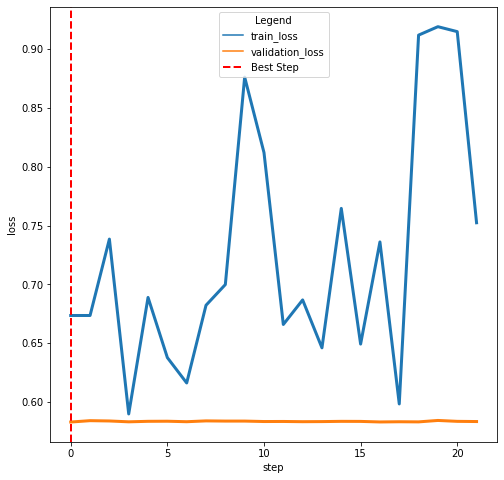


--- Entrenamiento aleatorio (23/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.0201, Best Val. Score=-0.0201, Training L
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:38:11,  4.55s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:38:11,  4.55s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:36:09,  4.54s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:36:09,  4.54s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:35:23,  4.53s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 4/10000 [00:18<12:35:23,  4.53s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,
Fine-tuning Steps:   0%| | 5/10000 [00:18<12:34:57,  4.53s/it, Best Val. Loss=0.0201, Best Val. Score=-0.0201,


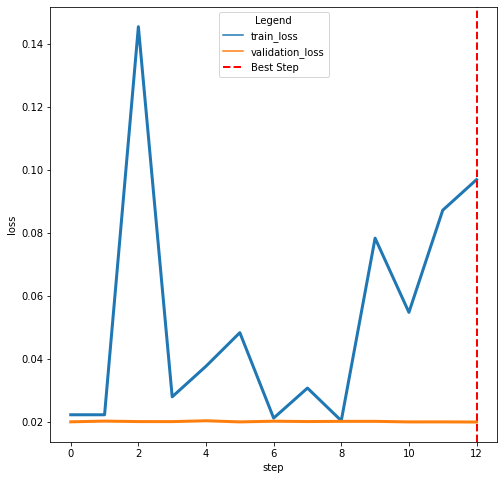


--- Entrenamiento aleatorio (24/30) con dataset: Funghi13 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:00<?, ?it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:00<1:37:32,  1.71it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:01<1:37:32,  1.71it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:01<2:37:32,  1.06it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:02<2:37:32,  1.06it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:02<2:13:01,  1.25it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:02<2:13:01,  1.25it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:02<1:57:50,  1.41it/s, Best Val. Loss=0.769, Best Val. Score=-0.769, Tr


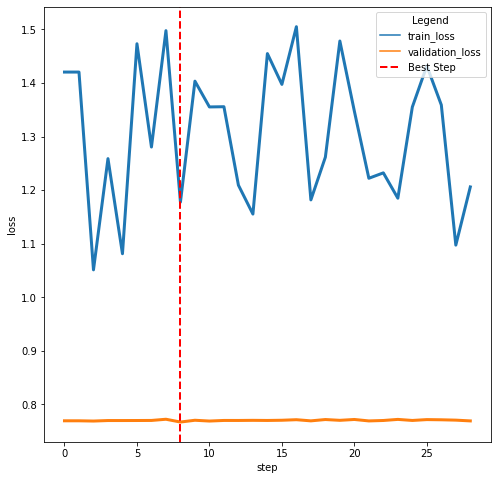


--- Entrenamiento aleatorio (25/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.02, Best Val. Score=-0.02, Training Loss=
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:37:29,  4.55s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:37:29,  4.55s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:35:29,  4.53s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 3/10000 [00:14<12:35:29,  4.53s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:19:53,  4.80s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 4/10000 [00:18<13:19:53,  4.80s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra
Fine-tuning Steps:   0%| | 5/10000 [00:18<13:01:55,  4.69s/it, Best Val. Loss=0.02, Best Val. Score=-0.02, Tra


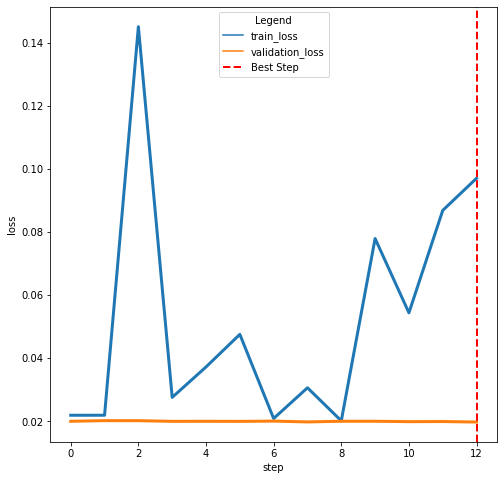


--- Entrenamiento aleatorio (26/30) con dataset: Cafe ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:54<11:43:09,  4.22s/it, Best Val. Loss=0.0885, Best Val. Score=-0.0885


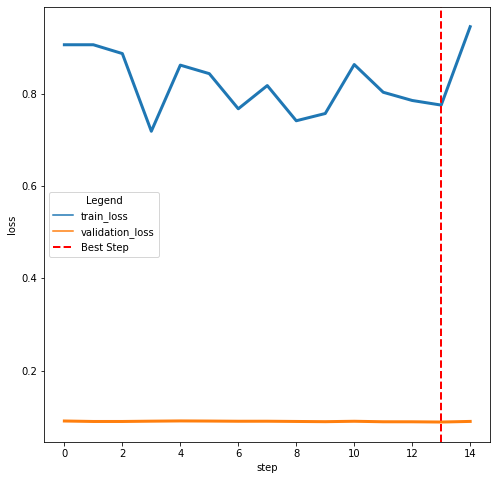


--- Entrenamiento aleatorio (27/30) con dataset: Gum3 ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.0199, Best Val. Score=-0.0199, Training L
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:12:36,  5.12s/it, Best Val. Loss=0.0199, Best Val. Score=-0.0199,
Fine-tuning Steps:   0%| | 2/10000 [00:10<14:12:36,  5.12s/it, Best Val. Loss=0.0197, Best Val. Score=-0.0197,
Fine-tuning Steps:   0%| | 3/10000 [00:10<14:12:29,  5.12s/it, Best Val. Loss=0.0197, Best Val. Score=-0.0197,
Fine-tuning Steps:   0%| | 3/10000 [00:14<14:12:29,  5.12s/it, Best Val. Loss=0.0197, Best Val. Score=-0.0197,
Fine-tuning Steps:   0%| | 4/10000 [00:14<13:27:51,  4.85s/it, Best Val. Loss=0.0197, Best Val. Score=-0.0197,
Fine-tuning Steps:   0%| | 4/10000 [00:19<13:27:51,  4.85s/it, Best Val. Loss=0.0196, Best Val. Score=-0.0196,
Fine-tuning Steps:   0%| | 5/10000 [00:19<13:44:57,  4.95s/it, Best Val. Loss=0.0196, Best Val. Score=-0.0196,


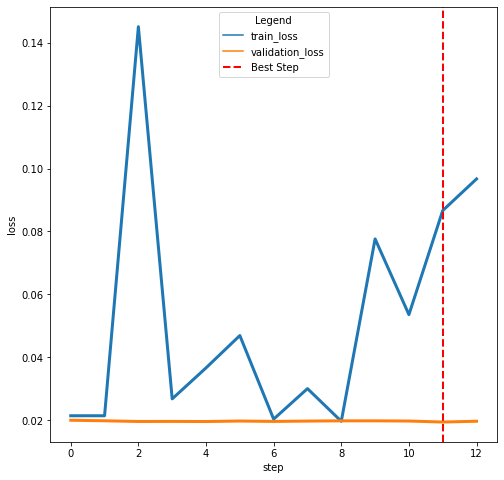


--- Entrenamiento aleatorio (28/30) con dataset: Cafe ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:55<11:52:21,  4.28s/it, Best Val. Loss=0.0869, Best Val. Score=-0.0869


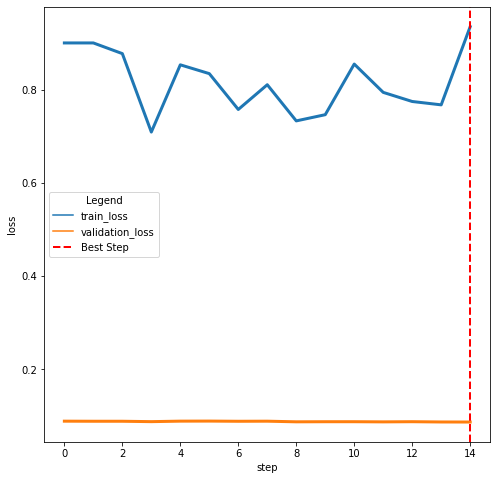


--- Entrenamiento aleatorio (29/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.465, Best Val. Score=-0.465, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:31:48,  3.07s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:31:48,  3.07s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:52:18,  3.19s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<8:52:18,  3.19s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<9:42:26,  3.50s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:13<9:42:26,  3.50s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:13<9:28:16,  3.41s/it, Best Val. Loss=0.465, Best Val. Score=-0.465, Tr


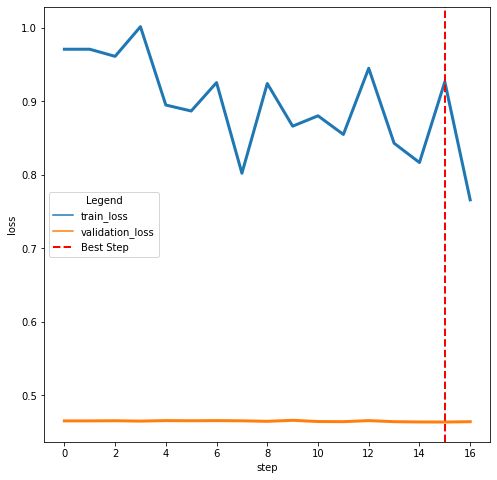


--- Entrenamiento aleatorio (30/30) con dataset: Ham ---
Cargando modelo base desde: ./Mentine.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.464, Best Val. Score=-0.464, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:31:23,  3.07s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:31:23,  3.07s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:51:31,  3.19s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<8:51:31,  3.19s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<8:58:01,  3.23s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:12<8:58:01,  3.23s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:12<9:00:59,  3.25s/it, Best Val. Loss=0.464, Best Val. Score=-0.464, Tr


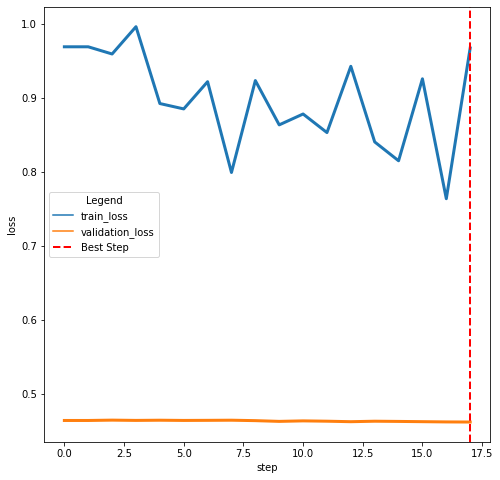

Outer Loop (Excluyendo de a un dataset):  17%|████▊                        | 2/12 [53:28<4:26:16, 1597.66s/it]


--- Excluyendo dataset: Forest ---

--- Entrenamiento aleatorio (1/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.283, Best Val. Score=-0.283, Training Los


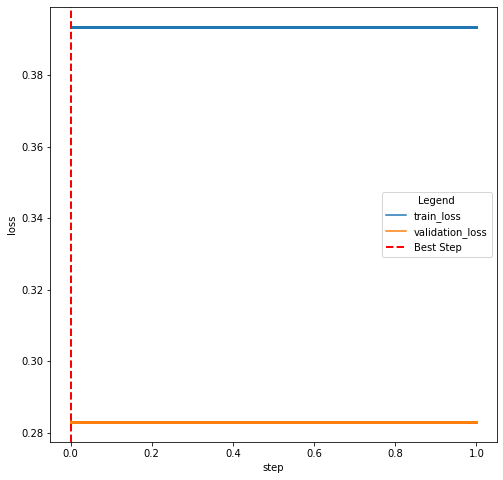


--- Entrenamiento aleatorio (2/30) con dataset: Cafe ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split

/home/granitto/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(

Fine-tuning Steps:   0%| | 14/10000 [00:54<11:43:48,  4.23s/it, Best Val. Loss=0.112, Best Val. Score=-0.112, 


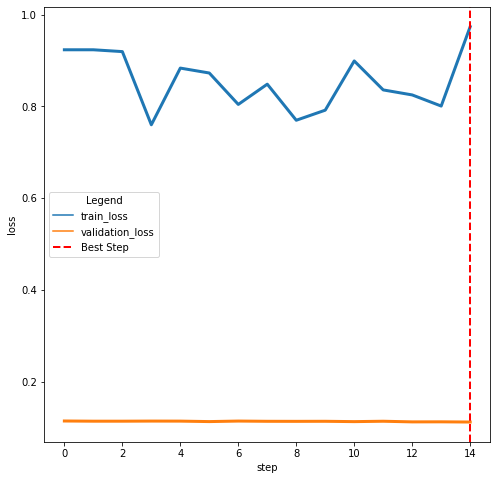


--- Entrenamiento aleatorio (3/30) con dataset: Mentine ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.864, Best Val. Score=-0.864, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:18:14,  4.07s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 2/10000 [00:08<11:18:14,  4.07s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:42:23,  4.58s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:42:23,  4.58s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<13:09:33,  4.74s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:18<13:09:33,  4.74s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 5/10000 [00:18<13:21:42,  4.81s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T


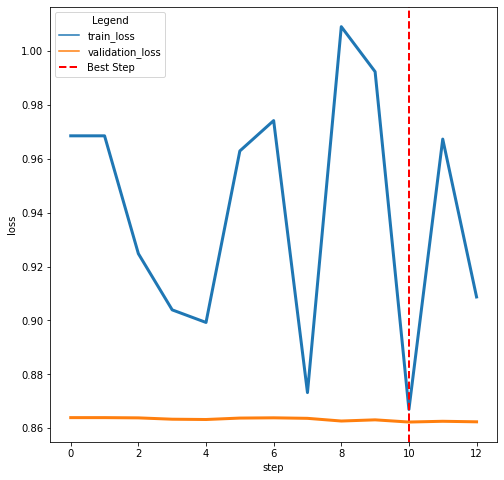


--- Entrenamiento aleatorio (4/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


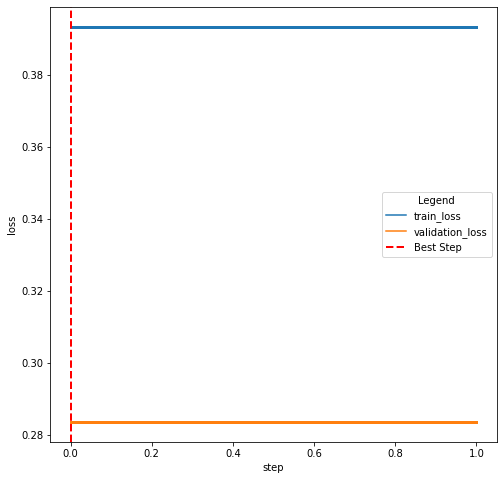


--- Entrenamiento aleatorio (5/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.000676, Best Val. Score=-0.000676, Traini
Fine-tuning Steps:   0%| | 2/10000 [00:04<12:38:43,  4.55s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 2/10000 [00:09<12:38:43,  4.55s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:35:55,  4.54s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:35:55,  4.54s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:13<12:35:03,  4.53s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 4/10000 [00:17<12:35:03,  4.53s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000
Fine-tuning Steps:   0%| | 5/10000 [00:17<12:16:08,  4.42s/it, Best Val. Loss=0.000676, Best Val. Score=-0.000


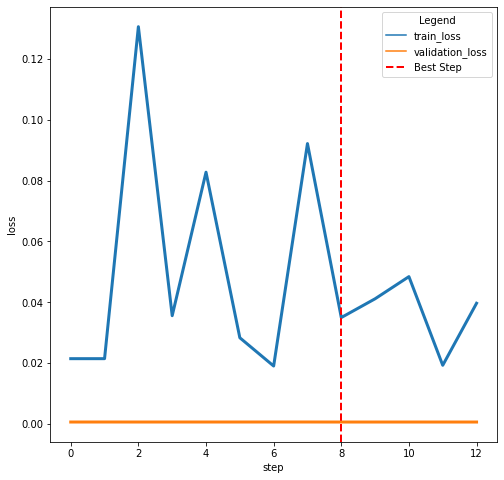


--- Entrenamiento aleatorio (6/30) con dataset: Tea ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:08<?, ?it/s, Best Val. Loss=0.226, Best Val. Score=-0.226, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:08<24:08:21,  8.69s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 2/10000 [00:17<24:08:21,  8.69s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 3/10000 [00:17<25:06:10,  9.04s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 3/10000 [00:26<25:06:10,  9.04s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 4/10000 [00:26<24:37:02,  8.87s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 4/10000 [00:35<24:37:02,  8.87s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T
Fine-tuning Steps:   0%| | 5/10000 [00:35<25:04:19,  9.03s/it, Best Val. Loss=0.226, Best Val. Score=-0.226, T


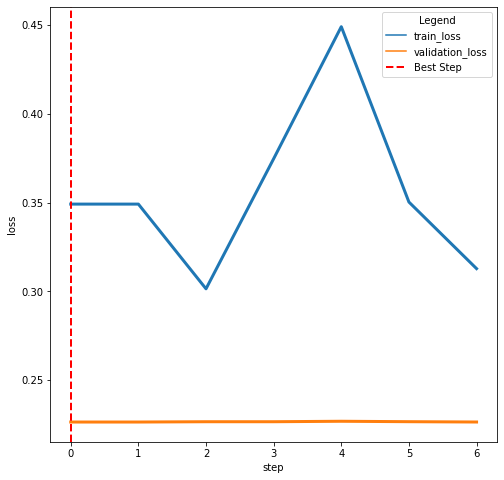


--- Entrenamiento aleatorio (7/30) con dataset: Gum2 ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:05<?, ?it/s, Best Val. Loss=0.00067, Best Val. Score=-0.00067, Training
Fine-tuning Steps:   0%| | 2/10000 [00:05<14:16:49,  5.14s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 2/10000 [00:09<14:16:49,  5.14s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:16:28,  4.78s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 3/10000 [00:14<13:16:28,  4.78s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 4/10000 [00:14<12:57:06,  4.66s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 4/10000 [00:18<12:57:06,  4.66s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006
Fine-tuning Steps:   0%| | 5/10000 [00:18<12:29:28,  4.50s/it, Best Val. Loss=0.00067, Best Val. Score=-0.0006


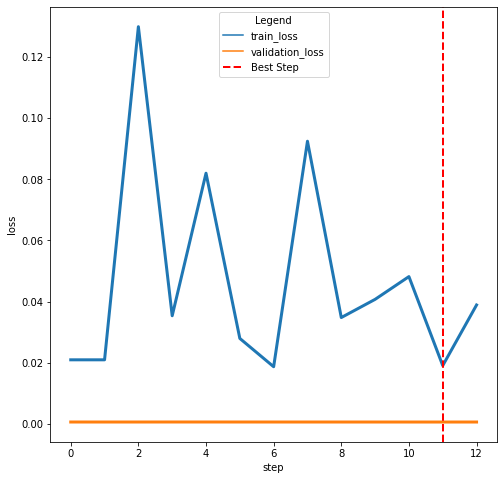


--- Entrenamiento aleatorio (8/30) con dataset: Funghi21 ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:32<?, ?it/s, Best Val. Loss=0.284, Best Val. Score=-0.284, Training Los


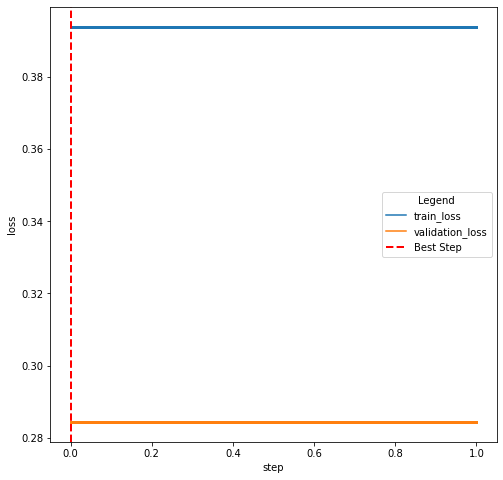


--- Entrenamiento aleatorio (9/30) con dataset: Mentine ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:04<?, ?it/s, Best Val. Loss=0.864, Best Val. Score=-0.864, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:04<11:19:18,  4.08s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 2/10000 [00:09<11:19:18,  4.08s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 3/10000 [00:09<12:42:59,  4.58s/it, Best Val. Loss=0.864, Best Val. Score=-0.864, T
Fine-tuning Steps:   0%| | 3/10000 [00:13<12:42:59,  4.58s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:13<13:08:36,  4.73s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 4/10000 [00:18<13:08:36,  4.73s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T
Fine-tuning Steps:   0%| | 5/10000 [00:18<13:20:35,  4.81s/it, Best Val. Loss=0.863, Best Val. Score=-0.863, T


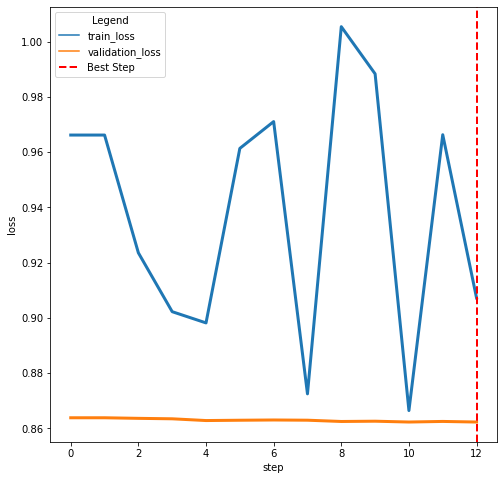


--- Entrenamiento aleatorio (10/30) con dataset: Tea ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:08<?, ?it/s, Best Val. Loss=0.227, Best Val. Score=-0.227, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:08<24:07:31,  8.69s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 2/10000 [00:17<24:07:31,  8.69s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 3/10000 [00:17<25:06:44,  9.04s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 3/10000 [00:26<25:06:44,  9.04s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 4/10000 [00:26<24:37:10,  8.87s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 4/10000 [00:35<24:37:10,  8.87s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T
Fine-tuning Steps:   0%| | 5/10000 [00:35<25:04:35,  9.03s/it, Best Val. Loss=0.227, Best Val. Score=-0.227, T


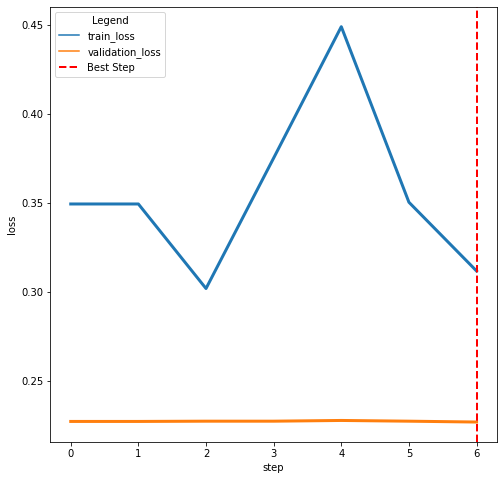


--- Entrenamiento aleatorio (11/30) con dataset: Peperoncini ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:02<?, ?it/s, Best Val. Loss=0.347, Best Val. Score=-0.347, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:02<7:42:26,  2.78s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:05<7:42:26,  2.78s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:05<7:42:22,  2.78s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:07<7:42:22,  2.78s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:07<6:55:38,  2.49s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:09<6:55:38,  2.49s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:09<6:33:38,  2.36s/it, Best Val. Loss=0.347, Best Val. Score=-0.347, Tr


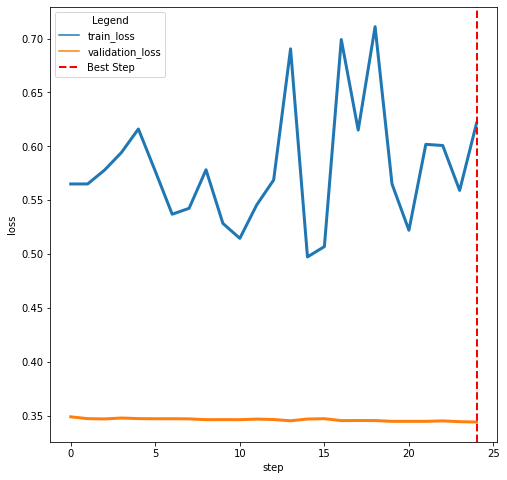


--- Entrenamiento aleatorio (12/30) con dataset: Ham ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.528, Best Val. Score=-0.528, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:28,  3.08s/it, Best Val. Loss=0.528, Best Val. Score=-0.528, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:28,  3.08s/it, Best Val. Loss=0.528, Best Val. Score=-0.528, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:06<8:52:27,  3.20s/it, Best Val. Loss=0.528, Best Val. Score=-0.528, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:10<8:52:27,  3.20s/it, Best Val. Loss=0.527, Best Val. Score=-0.527, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:10<9:42:57,  3.50s/it, Best Val. Loss=0.527, Best Val. Score=-0.527, Tr
Fine-tuning Steps:   0%| | 4/10000 [00:13<9:42:57,  3.50s/it, Best Val. Loss=0.527, Best Val. Score=-0.527, Tr
Fine-tuning Steps:   0%| | 5/10000 [00:13<9:28:26,  3.41s/it, Best Val. Loss=0.527, Best Val. Score=-0.527, Tr


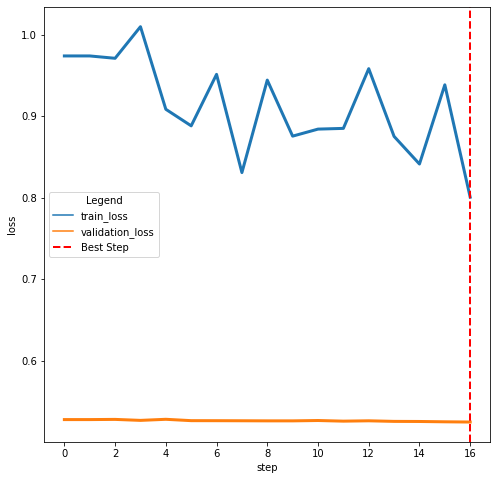


--- Entrenamiento aleatorio (13/30) con dataset: Ham ---
Cargando modelo base desde: ./Forest.r.ckpt



Fine-tuning Steps:   0%|                                                            | 1/10000 [00:00<?, ?it/s]
Fine-tuning Steps:   0%| | 1/10000 [00:03<?, ?it/s, Best Val. Loss=0.525, Best Val. Score=-0.525, Training Los
Fine-tuning Steps:   0%| | 2/10000 [00:03<8:32:13,  3.07s/it, Best Val. Loss=0.525, Best Val. Score=-0.525, Tr
Fine-tuning Steps:   0%| | 2/10000 [00:06<8:32:13,  3.07s/it, Best Val. Loss=0.525, Best Val. Score=-0.525, Tr
Fine-tuning Steps:   0%| | 3/10000 [00:09<13:02:49,  4.70s/it, Best Val. Loss=0.525, Best Val. Score=-0.525, T
Outer Loop (Excluyendo de a un dataset):  17%|████▌                      | 2/12 [1:04:01<5:20:05, 1920.57s/it]


KeyboardInterrupt: 

In [7]:
#PTRMS
#datasets = ["Tea", "Gum2", "Gum3", "Cafe", "Ham", "Pesce", "Spinaci", "Peperoncini", "Funghi13", "Funghi20", "Funghi21","Urine","Smoker","CancerTypes","Lab"]
#GC
#datasets = ["Funghi", "Peperoncini", "Spinaci", "Fragole","Nocciole"]

#datasets = ["Funghi13","Tea", "Gum2", "Gum3", "Cafe", "Ham", "Spinaci", "Peperoncini","Funghi21","Urine","Smoker","CancerTypes"]
datasets = ["Etnia","Mentine","Forest","Funghi13","Tea", "Gum2", "Gum3", "Cafe", "Ham", "Spinaci", "Peperoncini","Funghi21"]


TOT_PAS = 30       # Define el número total de entrenamientos aleatorios por cada dataset excluido
SAMPLE_SIZE = 0.66 # Define el tamaño de la muestra (70%)
#random.seed(42)   # Para reproducibilidad

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Loop through datasets
for dataset_to_exclude in tqdm(datasets, desc="Outer Loop (Excluyendo de a un dataset)"):
    print(f"\n--- Excluyendo dataset: {dataset_to_exclude} ---")

    param_grid={
            'model_path': f'./{dataset_to_exclude}.r.ckpt',
            'device': 'cuda',
            'ignore_pretraining_limits':True
    }

    training_datasets = [ds for ds in datasets if ds != dataset_to_exclude]

    for i in range(TOT_PAS):

        # Elegir un dataset al azar para entrenar
        random.seed(time.time())
        current_dataset = random.choice(training_datasets)
        print(f"\n--- Entrenamiento aleatorio ({i+1}/{TOT_PAS}) con dataset: {current_dataset} ---")

        this_data = loaded_datasets[current_dataset]

        IDs = pd.Series(this_data["IDs"])
        y_original = np.array(this_data["y"])
        X_original = pd.DataFrame(this_data["X"])
        # Obtener una muestra estratificada del 70%
        X, _, y, _ = train_test_split(
            X_original, y_original, test_size=1 - SAMPLE_SIZE, stratify=y_original
        )

        columns_to_keep = X.columns
        X = pd.DataFrame(scaler.fit_transform(X) , columns=columns_to_keep)

        finetunemymodel(X,y,param_grid,verbose=False)


In [8]:
def predict_class_by_label(IDs, y, X, classifier, param_grid={}, cv=5, gpu=False, verbose=True):
    """
    Calculates predictions for test sets, each with a unique label in IDs, and selects the best parameters using GridSearchCV.

    Args:
        IDs: A pandas Series containing labels.
        y: A pandas Series or numpy array containing target labels.
        X: A pandas DataFrame or numpy array containing features.
        classifier: A scikit-learn classifier class.
        param_grid: A dictionary specifying parameter options for GridSearchCV.
        cv: Number of folds for cross-validation. If cv=0 it directly tunes a single model
        gpu: If True, move X to gpu before training.
        verbose: If True, prints progress and metrics.

    Returns:
        predictions: Predictions for y as test sets.
        classification error.
        best_params_per_label: Dictionary with the best parameters for each label.
    """
    unique_labels = IDs.unique()
    best_params_per_label = {}
    
    # Ensure X and y are numpy arrays for compatibility
    #if not isinstance(X, np.ndarray):
    #    X = X.to_numpy()
    #if not isinstance(y, np.ndarray):
    #    y = y.to_numpy()

    predictions = y[:]*0

    for label in unique_labels:
        mask = (IDs == label)
            
        if gpu:
            X_train, X_test = cp.array(X[~mask]), cp.array(X[mask])
        else:
            X_train, X_test = X[~mask], X[mask]            
        y_train, y_test = y[~mask], y[mask]
        
        if cv>1:
            # Use GridSearchCV to find the best parameters
            grid_search = GridSearchCV(
                estimator=classifier(),
                param_grid=param_grid,
                scoring='accuracy',
                cv=cv,
                verbose=verbose
            )
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Store the best parameters
            best_params_per_label[label] = grid_search.best_params_

        else:
            #fine tune tabPFN if selected
            #if classifier is TabPFNClassifier and param_grid.get("model_path","auto") != "auto":
            #    finetunemymodel(X_train,y_train,param_grid,verbose)
            best_model = classifier(**param_grid)
            best_model.fit(X_train, y_train)
            best_params_per_label[label] = param_grid
    
        # Predict on the test set
        predictions[mask] = best_model.predict(X_test)
 
        if verbose:
            print(f"Label: {label}, Best Params: {best_params_per_label[label]}")
            print(f"Test Set error for label {label}: {round(1.0-accuracy_score(y_test, predictions[mask]), 4)}")

    # Final metrics
    final_error = 1.0-accuracy_score(y, predictions)
    
    if verbose:
        print(f"\nOverall Classification Error: {round(final_error, 4)}")

    return predictions, final_error, best_params_per_label


In [10]:
#PTRMS
#datasets = ["Tea", "Gum2", "Gum3", "Cafe", "Ham", "Pesce", "Spinaci", "Peperoncini", "Funghi13", "Funghi20", "Funghi21","Urine","Smoker","CancerTypes","Lab"]
#GC
#datasets = ["Funghi", "Peperoncini", "Spinaci", "Fragole","Nocciole"]
#Breath
#datasets = ["Mentine","Forest","Etnia"]
datasets = ["Etnia"]
            
# Dictionary to store results
results = {dataset: {} for dataset in datasets}


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Loop through datasets
for dataset in datasets:
    this_data = loaded_datasets[dataset]
    # Define model parameters

    models = {
      "tabPFN": {
        "classifier": TabPFNClassifier,
        "param_grid": {
            'model_path': 'auto',
            'device': 'cuda',
            'ignore_pretraining_limits':True
        },
        "cv": 0,
        "gpu": False
      },
      "finetune_tabPFN": {
        "classifier": TabPFNClassifier,
        "param_grid": {
            'model_path': f'./{dataset}.r.ckpt',
            'device': 'cuda',
            'ignore_pretraining_limits':True
        },
        "cv": 0,
        "gpu": False
      }
    }
    
    IDs = pd.Series(this_data["IDs"])
    y = np.array(this_data["y"])
    X = pd.DataFrame(this_data["X"])
    columns_to_keep = X.columns
    X = pd.DataFrame(scaler.fit_transform(X) , columns=columns_to_keep)
    
    for model_name, model_info in models.items():
        predict = predict_class_by_label(
            cv=model_info["cv"], 
            gpu=model_info["gpu"], 
            IDs=IDs, 
            y=y, 
            X=X, 
            classifier=model_info["classifier"], 
            param_grid=model_info["param_grid"], 
            verbose=False
        )
        results[dataset][model_name] = predict
        print(f"{dataset}-{model_name}: {round(predict[1],4)}")
        
        

Etnia-tabPFN: 0.2857
Etnia-finetune_tabPFN: 0.2857


In [11]:
dill.dump_session('Multiple_random_finetune_ptr_bre2.db')

In [12]:
# Print header
print("Dataset".ljust(12) + " | " + " | ".join(model_name.ljust(15) for model_name in models))

# Print separator line
print("-" * (12 + 3 + len(models) * 18))

# Print results
for dataset in datasets:
    result_line = f"{dataset.ljust(12)} | " + " | ".join(f"{round(results[dataset][model_name][1],4):<15}" for model_name in models)
    print(result_line)


Dataset      | tabPFN          | finetune_tabPFN
---------------------------------------------------
Etnia        | 0.2857          | 0.2857         


In [13]:
print("---------------------------")
print("Confusion matrices")
print("---------------------------")

for dataset in datasets:
    this_data = loaded_datasets[dataset]    
    y = np.array(this_data["y"])
    for model_name in models:
        confusion_matrix = pd.crosstab(y, results[dataset][model_name][0], rownames=['Actual'], colnames=['Predicted'])
        # Print the confusion matrix with a title
        print(f"Confusion Matrix for {dataset}-{model_name}:")
        print(confusion_matrix)
        print("\n")  # Add a newline for better readability


---------------------------
Confusion matrices
---------------------------
Confusion Matrix for Etnia-tabPFN:
Predicted   0   1
Actual           
0          27  12
1          10  28


Confusion Matrix for Etnia-finetune_tabPFN:
Predicted   0   1
Actual           
0          27  12
1          10  28


